![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 4

Esse notebook tem por objetivo explorar a implementação de filtros de aguçamento também conhecidos como detectores de borda. Os filtros abordados serão:

- Filtro Laplaciano
- Filtro de Sobel
- Filtro de Prewitt
- Operador Canny
- *Unsharp Mask*

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas, a definição das funções úteis e a leitura das imagens.

In [43]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline  

In [44]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[20,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    plt.figure(figsize=[20,10]) 
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/5,5,i+1)
        plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
        
# Funcao para calcular e exibir o histograma de uma imagem 
def pdiguide_histogram(img,nbins,show=False):
    # Essa funcao calcula o histograma de um vetor 2D (imagem grayscale)
    # com valores inteiros entre 0-255.
    # Essa imagem retorna um vetor 1D com o histograma e os pontos 
    # que representam o bin_edges para plotagem do histograma.
    # Caso show seja verdadeiro ela mesmo irá plotar o histograma
    h, bin_edges = np.histogram(img.ravel(), nbins,(0,255))
    if show:
        w=256./nbins
        bin_centers = bin_edges[1:]-(w/2)
        plt.bar(bin_centers, h, width=w)
    
    return h, bin_edges

In [45]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


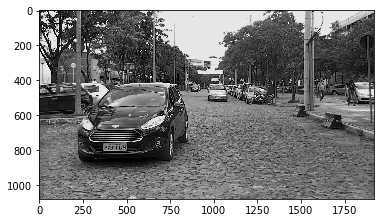

In [46]:
# Utilizando somente a imagem 0 
im = img[0]
plt.imshow(im,cmap='gray')

#### Filtros espaciais de suavização

De forma oposta aos filtros de suavização tem-se os filtros de aguçamento que
operam de forma similar aos filtros passa-altas do domínio da frequência, visto que eles
acentuam as variações de intensidade entre os pixels adjacentes. Normalmente se utilização
do conceito de gradiente de funções bidimensionais para buscar regiões de transição bruscas
de intensidade, como as bordas de um objeto.

Entre os principais gradientes utilizados tem-se o gradiente de Prewit e de Sobel. Por
serem gradiente esses filtros costumam ser utilizados em suas formas unidimensionais, isto
é, buscam transições em apenas um dos eixos x ou y. Essas formas podem ser combinadas
por meio de uma transformação polar gerando os filtros de magnitude e fase pra Sobel
e Prewitt. Outro filtro bastante utilizado é o filtro laplaciano. Esse filtro aproveita da
segunda derivada da imagem para extrair as regiões de transição. Apesar do conceito por
trás desses filtros serem complexos as matrizes que os implementam não o são (PEDRINI;
SCHWARTZ, 2008).

Veremos agora como implementar os filtros de Laplaciano, Prewitt e o Sobel.

(<matplotlib.image.AxesImage at 0x7f3fdcb9d550>, Text(0.5, 1.0, 'Laplaciano'))

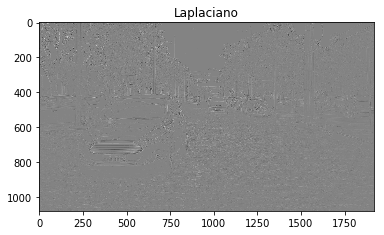

In [47]:
# Filtro Laplaciano
laplacian = cv2.Laplacian(im,cv2.CV_64F) 

# Normalizacao do resultado
laplacian = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.imshow(laplacian,cmap = 'gray'), plt.title('Laplaciano')

O filtro Laplaciano utiliza como máscara espacial uma matriz cujos valores a partir do ponto central são uma distribuição de Laplace. Dessa forma a saída do filtro são valores de pixel ainda entre 0 e 255.

A função Laplaciana trabalha com valores *float*, pontos flutuantes ou racionais. Por isso, que após o cálculo do filtro Laplaciano é necessário **normalizar** a imagem. 

A **normalização** é o processo de escalonar os valores em um intervalo com tipo de variável definido a partir de uma função normalização, a qual discretiza, isto é, aproxima os valores, para se enquadrarem no intervalo definido.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3fdcbfc6a0>,
 Text(0.5, 1.0, 'Prewitt y'))

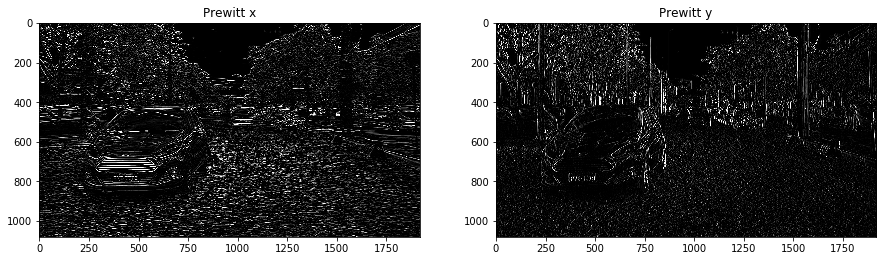

In [48]:
# Filtro de Prewitt
kernelx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) # filtro de Prewitt eixo x
kernely = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) # filtro de Prewitt eixo y

img_prewittx = cv2.filter2D(im, -1, kernelx) #Funcao para aplicacao de filtros diversos
img_prewitty = cv2.filter2D(im, -1, kernely)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1), plt.imshow(img_prewittx,cmap = 'gray'), plt.title('Prewitt x')
plt.subplot(1,2,2), plt.imshow(img_prewitty,cmap = 'gray'), plt.title('Prewitt y')

O filtro de Prewitt pode ser aplicado através da convulação de duas máscaras pela imagem. Essas máscaras (kernelx e kernely) buscam destacar as regiões de transição realizando a subtração entre os pixels. A máscara do eixo x realiza subtrações na vertical, dando destaque as linhas horizontais e a máscara do eixo y faz a subtração na horizontal dando destaque as linhas verticais.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f3fdcae8400>,
 Text(0.5, 1.0, 'Sobel Angulo'))

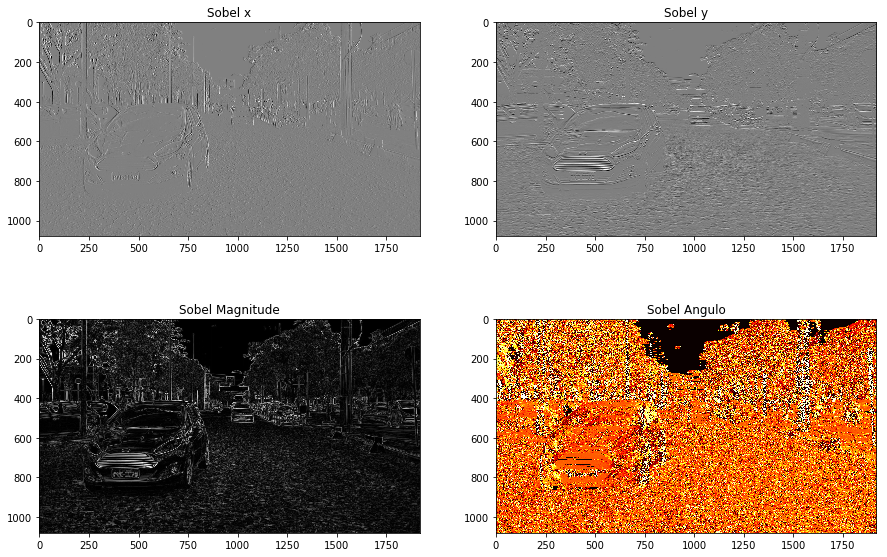

In [49]:
# Filtro de Sobel
sobelx = cv2.Sobel(im,cv2.CV_64F,1,0,ksize=5) # filtro de sobel eixo x
sobely = cv2.Sobel(im,cv2.CV_64F,0,1,ksize=5) # filtro de sobel eixo y

# Calculo da magnitude
sobel_mag = (sobelx**2 + sobely**2)**0.5 

# Calculo do angulo
sobel_ang = np.rad2deg(np.angle(sobelx+sobely*1j)) # 1j é uma constante complexa
sobel_ang = (sobel_ang >= 0)*sobel_ang + (sobel_ang < 0)*(sobel_ang + 180) #define os angulos entre 0 e 180
sobel_ang = (sobel_ang < 180)*sobel_ang #define que angulo de 180 = angulo 0

# Normalizacao dos resultados
sobelx = cv2.normalize(sobelx, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobely = cv2.normalize(sobely, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobel_mag = cv2.normalize(sobel_mag, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
sobel_ang = cv2.normalize(sobel_ang, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1), plt.imshow(sobelx,cmap = 'gray'), plt.title('Sobel x')
plt.subplot(2,2,2), plt.imshow(sobely,cmap = 'gray'), plt.title('Sobel y')
plt.subplot(2,2,3), plt.imshow(sobel_mag,cmap = 'gray'), plt.title('Sobel Magnitude')
plt.subplot(2,2,4), plt.imshow(sobel_ang,cmap = 'hot'), plt.title('Sobel Angulo')

O filtro de Sobel é bem similar ao de Prewitt com a diferença que suas máscaras possuem valores diferentes. No exemplo acima foi cálculado a maqnitude e o ângulo da imagem após a aplicação dos filtros de Sobel.

Um filtro de aguçamento que não causa o efeito de remoção das regiões homogêneas
e portanto não se insere no contexto dos detectores de borda é o filtro chamado máscara
de nitidez ou *unsharp mask*. Ela consiste da subtração de uma imagem com sua imagem
borrada e servem para aumentar a nitidez da imagem (GONZALEZ; WOODS, 2006).

Vamos tentar implementar um filtro de *unsharp mask*. Observe como os contornos e linhas da imagem ficam mais definidas, isto é, mais nítidas.

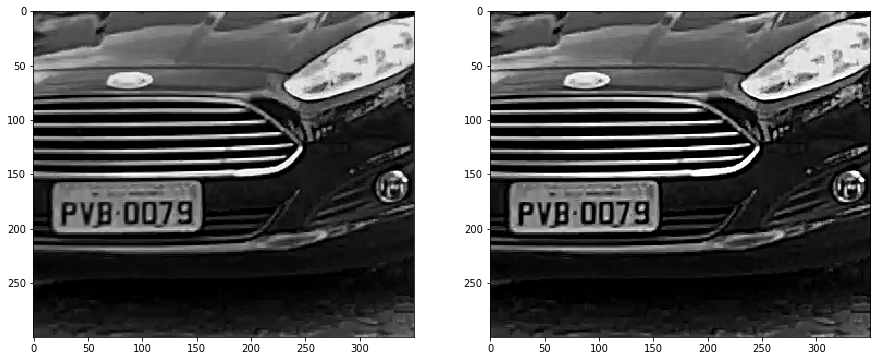

In [50]:
# Unsharp mask
gaussian = cv2.GaussianBlur(im, (9,9), 10.0) #borragem da imagem original
unsharp_image = cv2.addWeighted(im, 1.3, gaussian, -0.3, 0) #subtração pondearada da imagem original com a borrada

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.imshow(im[600:900,350:700],cmap='gray')
plt.subplot(1,2,2)
plt.imshow(unsharp_image[600:900,350:700],cmap='gray')

#### Outras técnicas de detecção de borda

Uma técnica que vem sendo bastante utilizada como detector de borda é o filtro ou operdaor de Canny. Esse método une filtros de suavização e de aguçamento para detectar as bordas tendo menor sucetibilidade a ruídos.

Vamos tentar implementar esse operador.

Obs: Para melhorar o resultado do Canny consulte as referências.

(<matplotlib.image.AxesImage at 0x7f3fdc9a2b00>, Text(0.5, 1.0, 'Canny'))

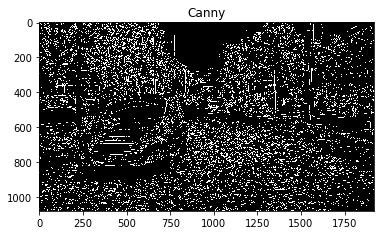

In [51]:
# Filtro de Canny
img_canny = cv2.Canny(im,100,200)

plt.imshow(img_canny,cmap = 'gray'), plt.title('Canny')

Existem diferentes outros detectores de bordas, como exemplo, no notebook referente aos Operadores Morfológicos iremos implementar o operador Gradiente Morfológico.

### Referências